In [1]:
%reload_ext autoreload
%autoreload 2

import os
import sys
module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)

In [2]:
from stockMarket.core import get_tickers_from_index

tickers = get_tickers_from_index('sp500')

In [3]:
from stockMarket.technicalAnalysis.trade import (
    TradeStatus,
    TradeSettings
)

TradeStatus.write_description_to_file("/home/jag/rclone/drive/stockMarket/Trading/strategy_testing/trade_status_description.txt")

TradeSettings.write_description_to_file("/home/jag/rclone/drive/stockMarket/Trading/strategy_testing/trade_settings_description.txt")

In [14]:
import pandas as pd
import warnings

from stockMarket.technicalAnalysis.strategy import Strategy
from stockMarket.technicalAnalysis.trade import TradeSettings
from stockMarket.technicalAnalysis.enums import StrategyStoringBehavior
from stockMarket.technicalAnalysis.strategyObjects import (
    EMAStrategy,
    FIBStrategy,
    RSIStrategy,
    SMAStrategy,
)

settings = TradeSettings(
    loss_limit=None, # in percent +- so 0.2 meand 20% higher then distance to stop loss
    min_PL=0.5,
    max_PL=None,
    min_TP_B_TC_B_to_LOW_RATIO=None,
    min_ratio_high_to_ref_candle=1.03,
    max_drawdown_ratio_after_new_high=0.95,
)

strategy = Strategy(
    # [FIBStrategy([0.3, 0.7])],
    [SMAStrategy([8, 20, 50]), FIBStrategy([0.3, 0.7])],
    # [SMAStrategy([8, 20, 50]), EMAStrategy([8, 20, 50]), FIBStrategy([0.3, 0.7])],
    # [EMAStrategy([8, 20, 50]), FIBStrategy([0.3, 0.7])],
    # [EMAStrategy([8, 20, 50]), FIBStrategy([0.3, 0.7]), RSIStrategy(14, 60, 70)],
    start_date="06.03.2014",
    end_date="05.03.2024",
    candle_period="weekly",
    base_path="/home/jag/rclone/drive/stockMarket/Trading/strategy_testing",
    storing_behavior=StrategyStoringBehavior.NUMERICAL,
    trade_settings=settings,
    use_earnings_dates=False,
    finalize_commands=["~/bin/rclone/sync_stockMarket.sh push"],
    # batch_size=pd.Timedelta(days=365),
)

with warnings.catch_warnings():
    #ignore all FutureWarrning: pandas
    warnings.simplefilter(action='ignore', category=FutureWarning)
    strategy.screen(tickers)

/home/jag/rclone/drive/stockMarket/Trading/strategy_testing/FIB_SMA_11/.strategy.json


 12%|█▏        | 58/503 [01:55<17:24,  2.35s/it]BF.B: No price data found, symbol may be delisted (1wk 2012-04-05 -> 2024-03-25)
BG: No price data found, symbol may be delisted (1d 2017-09-11 -> 2017-09-18)
BG: No price data found, symbol may be delisted (1d 2017-09-11 -> 2017-09-18)
100%|██████████| 503/503 [20:17<00:00,  2.42s/it]


TypeError: Object of type Trade is not JSON serializable

/home/jag/projects/stockMarket/stockMarket/technicalAnalysis/strategy.py:293: RuntimeWarning: invalid value encountered in divide
  PL_ratio = win_counts / (win_counts + loss_counts)
/home/jag/projects/stockMarket/stockMarket/technicalAnalysis/strategy.py:315: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax2.set_ylabel('normed PL ratio')
2024/03/24 21:58:38 INFO  : Trading/strategy_testing/FIB_SMA_9: Set directory modification time (using SetModTime)
2024/03/24 21:58:40 INFO  : Trading/strategy_testing/FIB_SMA_9/PL_histogram.png: Copied (new)
2024/03/24 21:58:40 INFO  : 
Transferred:   	   41.780 KiB / 41.780 KiB, 100%, 41.737 KiB/s, ETA 0s
Checks:               134 / 134, 100%
Transferred:            1 / 1, 100%
Elapsed time:         5.0s

2024/03/24 21:58:43 INFO  : Trading/strategy_testing/FIB_SMA_9: Set directory modification time (using SetModTime)
2024/03/24 21:58:46 INFO  : Trading/strategy_test

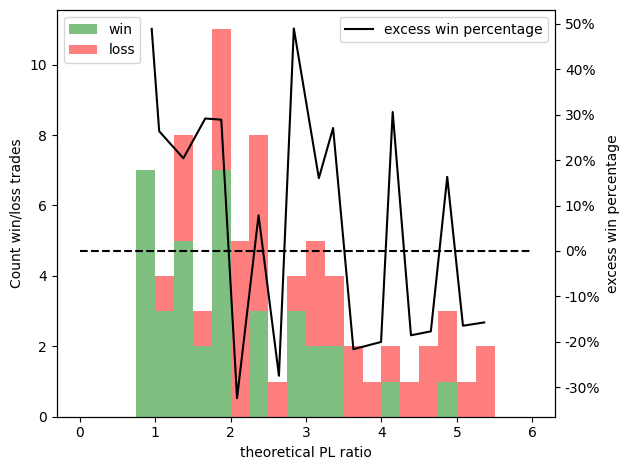

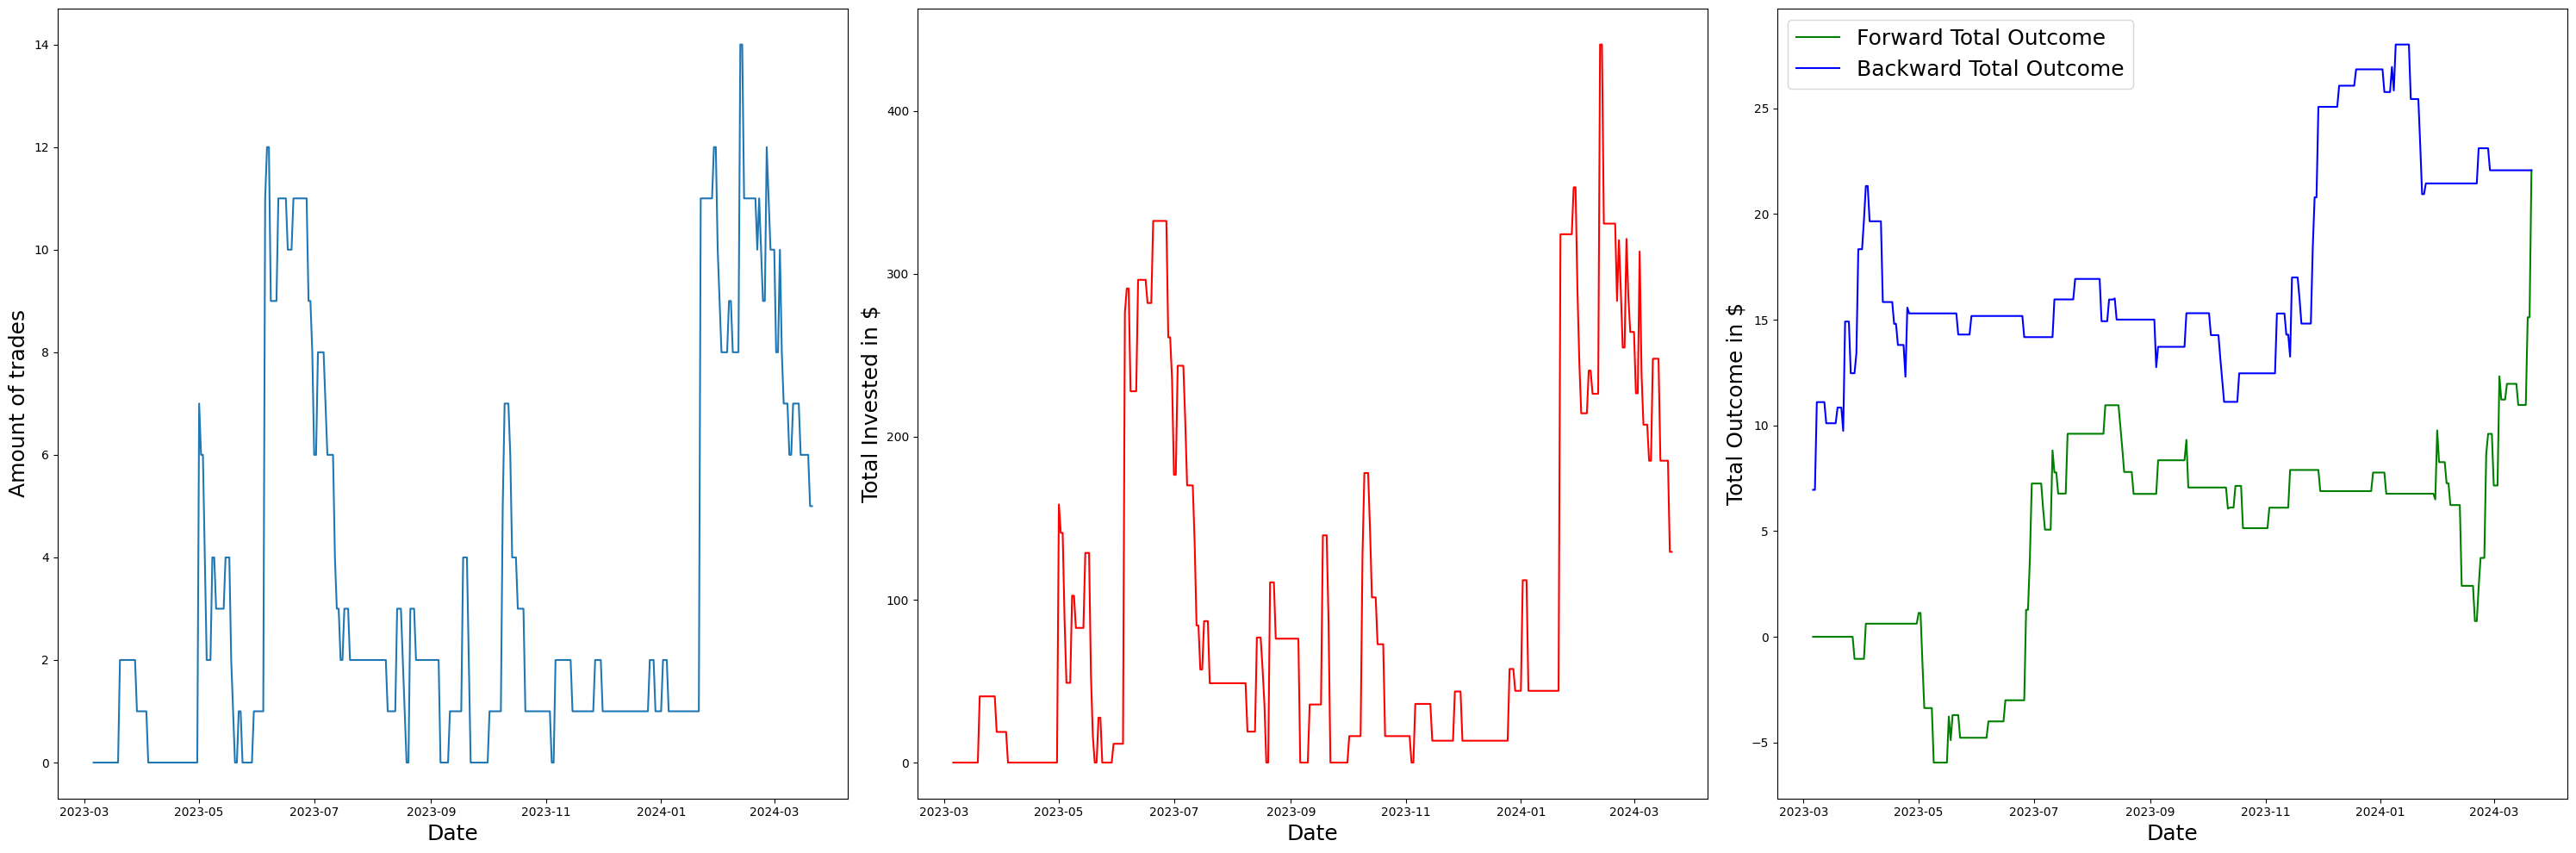

In [45]:
strategy.plot_PL_histogram()
strategy.plot_trades_vs_time()